In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import math
from prettytable import PrettyTable
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv('^GSPC.csv')
df.columns = ['date', 'adj_close']
df['date'] = pd.to_datetime(df.date, infer_datetime_format=True)



In [3]:
df.sort_values(by = ['date'], inplace =True)
df.reset_index(drop=True, inplace = True)

In [4]:
df

,date,adj_close
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000
...,...,...
23171,2020-04-01,2470.500000
23172,2020-04-02,2526.899902
23173,2020-04-03,2488.649902
23174,2020-04-06,2663.679932


In [5]:
#daily return in percentage terms
df['lag1_price'] = df.adj_close.shift(1)
df['return'] = (df.adj_close/df.lag1_price-1)*100

In [6]:
df['cummax'] = df['adj_close'].cummax()

# Drawdown is "(today price - high till this date)/high till this date"
df['drawdown'] =  ((df['adj_close'] - df['cummax'])/df['cummax'])*100



In [7]:
#Another way to calculate drawdown from returns
'''cum_returns = ((1 + df['return']/100).cumprod())*100
drawdown =  (1 - cum_returns.div(cum_returns.cummax()))*100
drawdown.max()'''

"cum_returns = ((1 + df['return']/100).cumprod())*100\ndrawdown =  (1 - cum_returns.div(cum_returns.cummax()))*100\ndrawdown.max()"

In [8]:
df

,date,adj_close,lag1_price,return,cummax,drawdown
0,1927-12-30,17.660000,NaN,NaN,17.660000,0.000000
1,1928-01-03,17.760000,17.660000,0.566251,17.760000,0.000000
2,1928-01-04,17.719999,17.760000,-0.225231,17.760000,-0.225231
3,1928-01-05,17.549999,17.719999,-0.959368,17.760000,-1.182438
4,1928-01-06,17.660000,17.549999,0.626786,17.760000,-0.563063
...,...,...,...,...,...,...
23171,2020-04-01,2470.500000,2584.590088,-4.414243,3386.149902,-27.041033
23172,2020-04-02,2526.899902,2470.500000,2.282935,3386.149902,-25.375427
23173,2020-04-03,2488.649902,2526.899902,-1.513713,3386.149902,-26.505029
23174,2020-04-06,2663.679932,2488.649902,7.033132,3386.149902,-21.336030


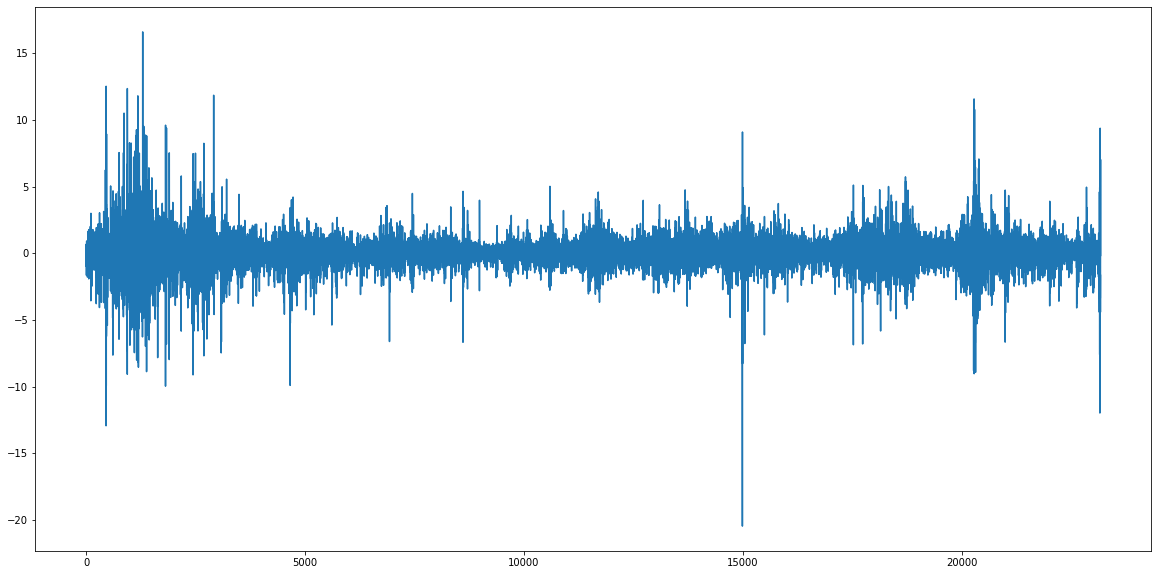

In [9]:
plt.plot(df['return'])

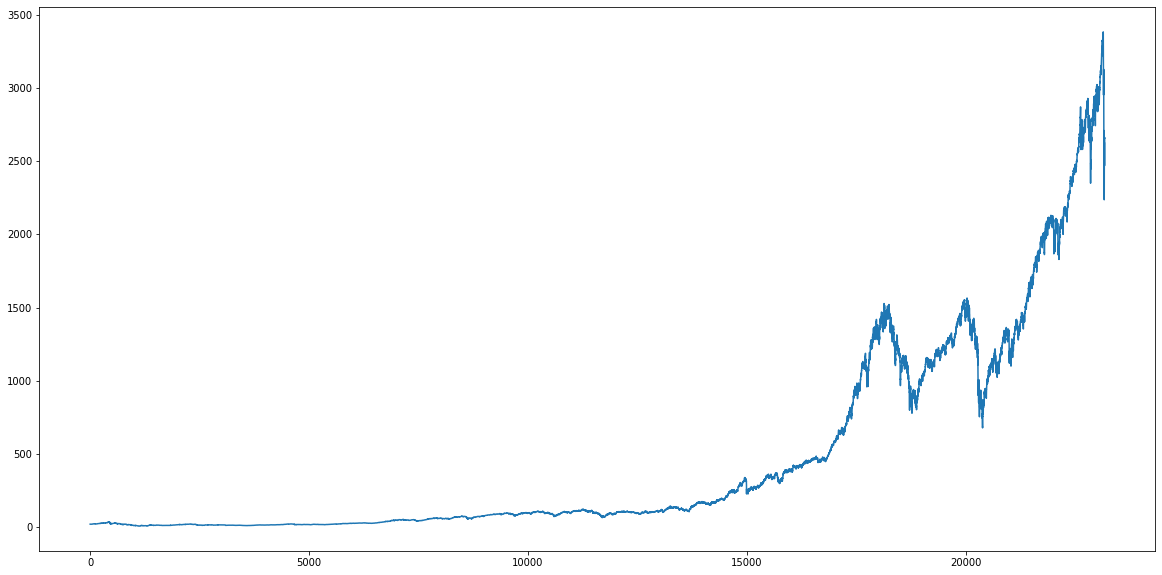

In [10]:
plt.plot(df['adj_close'])

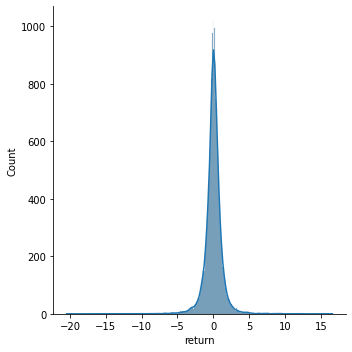

In [11]:
sns.displot(df['return'], kde=True)

In [12]:
#about distribution parameters
print('Mean:', df['return'].mean(), '\n', 'Median:', df['return'].median(), '\n' ,'Standard_deviation:', df['return'].std())

Mean: 0.028836929852273978 
 Median: 0.04713428801133013 
 Standard_deviation: 1.1985026224374946


In [13]:
#Is Distribution Normal?
print('Skewness:', df['return'].skew(), '\n', 'Kurtosis:', df['return'].kurt())

Skewness: -0.11229546417115498 
 Kurtosis: 17.744234586520335


In [14]:
#Distribution doesn't seem to be normal but negatively skewed where mean is smaller than median also 
#more peaked becuase kurtosis is higher than 3 so most of data must be around the mean

In [15]:
df['year'] = df.date.dt.year
df.dropna(inplace =True)

In [16]:
df.reset_index(drop=True, inplace = True)

In [17]:
df

,date,adj_close,lag1_price,return,cummax,drawdown,year
0,1928-01-03,17.760000,17.660000,0.566251,17.760000,0.000000,1928
1,1928-01-04,17.719999,17.760000,-0.225231,17.760000,-0.225231,1928
2,1928-01-05,17.549999,17.719999,-0.959368,17.760000,-1.182438,1928
3,1928-01-06,17.660000,17.549999,0.626786,17.760000,-0.563063,1928
4,1928-01-09,17.500000,17.660000,-0.906002,17.760000,-1.463964,1928
...,...,...,...,...,...,...,...
23170,2020-04-01,2470.500000,2584.590088,-4.414243,3386.149902,-27.041033,2020
23171,2020-04-02,2526.899902,2470.500000,2.282935,3386.149902,-25.375427,2020
23172,2020-04-03,2488.649902,2526.899902,-1.513713,3386.149902,-26.505029,2020
23173,2020-04-06,2663.679932,2488.649902,7.033132,3386.149902,-21.336030,2020


In [18]:
Number_of_days = df.shape[0]


In [19]:
Annualized_return = (((1+df['return']/100).prod())**(365/Number_of_days) -1)*100

In [20]:
#Here is the Anuualized Reurn
Annualized_return

8.218043355285598

In [21]:
#Annualized Risk in percentage terms is sqrt(252)*daily_standard_deviation_of_return
Annualized_risk = df['return'].std()*math.sqrt(252)
Annualized_risk

19.02563930777011

In [22]:
#Sharpe Ratio
Sharpe_ratio = (Annualized_return - 1.5)/Annualized_risk
Sharpe_ratio

0.3531047365405448

In [23]:
#Maximum Drawdown is minimum value of the whole drawdown series
df['drawdown'].min() 

-86.18957984339045

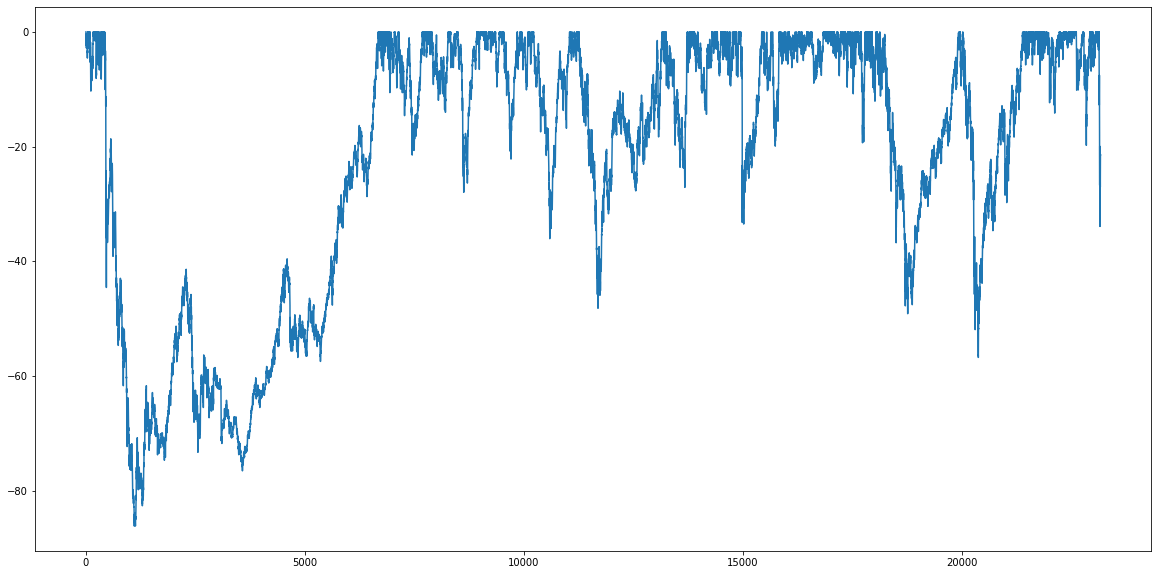

In [24]:
plt.plot(df['drawdown'])

In [25]:
#Correlation between lag and todays price

df['lag1_price'].corr(df['adj_close'])

0.9999050397829357

In [26]:

table = PrettyTable()
table.hrules = 1

table.title = 'Summary Table of Above Calculations'
table.field_names = ['Parameter', 'Value']
table.add_row(['Mean Of Daily Return', df['return'].mean()])
table.add_row(['Median Of Daily Return', df['return'].median()])

table.add_row(['Standard Deviation Of Daily Return', df['return'].std()])
table.add_row(['Skewness Deviation Of Daily Return', df['return'].skew()])

table.add_row(['Kurtosis Of Daily Return', df['return'].kurt()])

table.add_row(['Annualized Return %', Annualized_return])
table.add_row(['Annualized Risk %', Annualized_risk])
table.add_row(['Sharpe Ratio', Sharpe_ratio])
table.add_row(['Maximum Drawdown %', df['drawdown'].min() ])
table.add_row(['Correlation between lag1_price and adj_close', df['lag1_price'].corr(df['adj_close'])])
print(table)

+---------------------------------------------------------------------+
|                 Summary Table of Above Calculations                 |
+----------------------------------------------+----------------------+
|                  Parameter                   |        Value         |
+----------------------------------------------+----------------------+
|             Mean Of Daily Return             | 0.028836929852273985 |
+----------------------------------------------+----------------------+
|            Median Of Daily Return            | 0.04713428801133013  |
+----------------------------------------------+----------------------+
|      Standard Deviation Of Daily Return      |  1.1985026224374946  |
+----------------------------------------------+----------------------+
|      Skewness Deviation Of Daily Return      | -0.11229546417115502 |
+----------------------------------------------+----------------------+
|           Kurtosis Of Daily Return           |  17.74423458652

In [27]:
#The result that correlation between the lag varible and the adj_close varible is 99.99%
#means that the index is upward/downward trending and that doesn't neccesarily indicate that this will be the 
#case in a short time frame, where there is no trend

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
lr_data = df[['date','return']]


In [30]:
lr_data['lag1'] = lr_data['return'].shift(1)
lr_data['lag2'] = lr_data['return'].shift(2)

/var/folders/36/2w68f_916m5_4nk8vnz8j2yw0000gn/T/ipykernel_88638/2552834898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_data['lag1'] = lr_data['return'].shift(1)
/var/folders/36/2w68f_916m5_4nk8vnz8j2yw0000gn/T/ipykernel_88638/2552834898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr_data['lag2'] = lr_data['return'].shift(2)


In [31]:
lr_data.dropna(axis = 0, inplace = True)

/Users/shivams/miniconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [32]:
lr1_X = lr_data['lag1']
lr2_X = lr_data[['lag1', 'lag2']]
lr_y = lr_data['return']

In [33]:
model1 = LinearRegression()

In [34]:
model1.fit(lr1_X.values.reshape(-1, 1), lr_y)

LinearRegression()

In [35]:
model1.coef_

array([-0.01261971])

In [36]:
print(f'Model_R2 : {model1.score(lr1_X.values.reshape(-1, 1), lr_y)}\nCoefficient_lag1_variable:{model1.coef_[0]}\nIntercept:{model1.intercept_}')

Model_R2 : 0.00015925733610777648
Coefficient_lag1_variable:-0.012619714673580964
Intercept:0.029188426564472136


In [37]:
model.fit(lr2_X, lr_y)

LinearRegression()

In [38]:
print(f'Model_R2 : {model.score(lr2_X, lr_y)}\nCoefficient_lag1_variable:{model.coef_[0]}\nCoefficient_lag2_variable:{model.coef_[1]}\nIntercept:{model.intercept_}')

Model_R2 : 0.000510935839727944
Coefficient_lag1_variable:-0.01285589567937804
Coefficient_lag2_variable:-0.018768327329861105
Intercept:0.02973093494505151


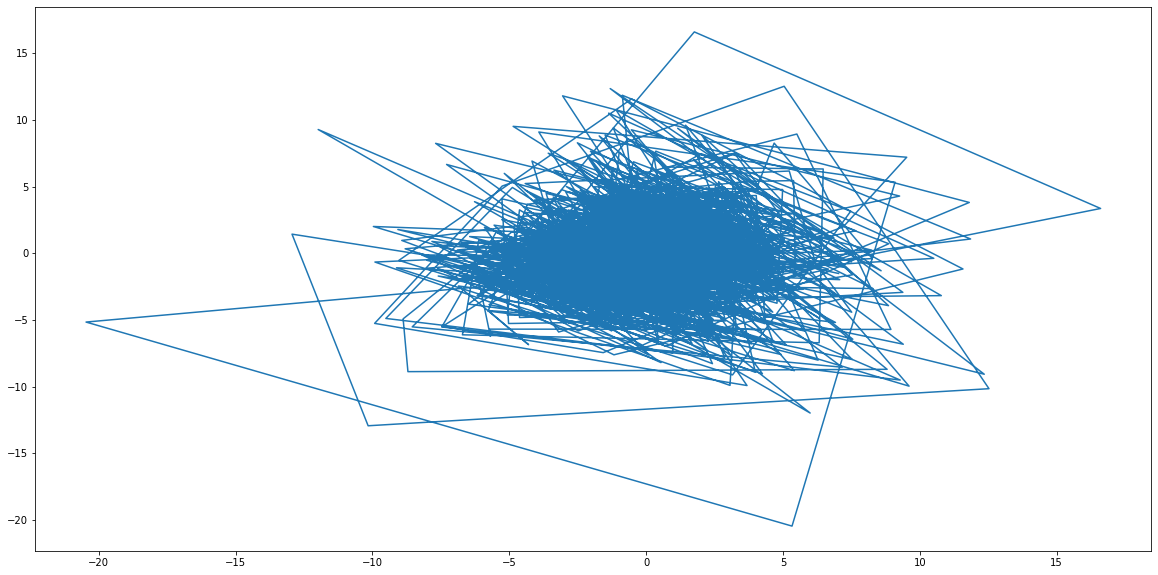

In [39]:
plt.plot(lr2_X['lag1'], lr2_X['lag2'])

In [40]:
#Regression for model with lag1
import statsmodels.api as sm

data_X = sm.add_constant(lr1_X, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(lr_y, data_X)

res = mod.fit()

print(res.summary())

#In this regression with one varibale lag1, p>\t\ says that there is 5.5% chance that the relationship 
#between lag1 and our dependent variable is by chance which exceeds our alpha value of 1%, 
#so lag1 is not singlificant in our prediction while intercept is significant

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.691
Date:                Sun, 05 Dec 2021   Prob (F-statistic):             0.0547
Time:                        17:47:35   Log-Likelihood:                -37076.
No. Observations:               23173   AIC:                         7.416e+04
Df Residuals:                   23171   BIC:                         7.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lag1          -0.0126      0.007     -1.921      0.0

In [41]:
#Regression for model with lag1 and lag2

data_X = sm.add_constant(lr2_X, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(lr_y, data_X)

res = mod.fit()

print(res.summary())

#In this regression with two varibales lag1 & lag2, p>\t\ says that there is 5% chance that the relationship 
#between lag1 and our dependent variable is by chance which exceeds our alpha value of 1%,  while lag2 seems 
#to be significant as it doesn't exceed 1% of significance level(0.4%)
#so lag1 is not singlificant in our prediction but lag2 is significant while intercept is also significant

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.922
Date:                Sun, 05 Dec 2021   Prob (F-statistic):            0.00268
Time:                        17:47:35   Log-Likelihood:                -37072.
No. Observations:               23173   AIC:                         7.415e+04
Df Residuals:                   23170   BIC:                         7.417e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lag1          -0.0129      0.007     -1.957      0.0

In [42]:
#We should go with the model2 having lag1 and lag2 as variables because of better fitness score(R2) and one variable
#having significance according to our significance level

In [43]:
residuals1 = (lr_y.values - model1.predict(lr1_X.values.reshape(-1, 1)))

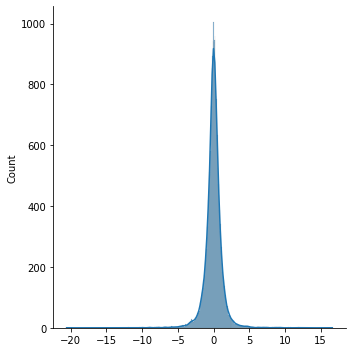

In [44]:
sns.displot(residuals1, kde = True)

In [45]:
#Residuals are negatively skewed with heavy-peaked tail as confirmed by the statistics
table1 = PrettyTable()
table.hrules = 1
table1.title = 'Statistics of Residuals in model 1'
table1.field_names = ['Parameter', 'Value']
table1.add_row(['Mean Of Residuals', pd.Series(residuals1).mean()])
table1.add_row(['Median Of Residuals', pd.Series(residuals1).median()])
table1.add_row(['Skewness Of Residuals', pd.Series(residuals1).skew()])
table1.add_row(['Kurtosis Of Residuals', pd.Series(residuals1).kurt()])
print(table1)

+------------------------------------------------+
|       Statistics of Residuals in model 1       |
+-----------------------+------------------------+
|       Parameter       |         Value          |
+-----------------------+------------------------+
|   Mean Of Residuals   | 3.0662526895960823e-18 |
|  Median Of Residuals  |  0.019236238396245844  |
| Skewness Of Residuals |  -0.1285561167341884   |
| Kurtosis Of Residuals |    17.748857480097     |
+-----------------------+------------------------+


In [46]:
#Residuals are negatively skewed with heavy-peaked tail as confirmed by the statistics
residuals2 = (lr_y.values - model.predict(lr2_X))
table = PrettyTable()
table.hrules = 1

table.title = 'Statistics of Residuals in model 2'
table.field_names = ['Parameter', 'Value']
table.add_row(['Mean Of Residuals', pd.Series(residuals2).mean()])
table.add_row(['Median Of Residuals', pd.Series(residuals2).median()])
table.add_row(['Skewness Of Residuals', pd.Series(residuals2).skew()])
table.add_row(['Kurtosis Of Residuals', pd.Series(residuals2).kurt()])

print(table)

+------------------------------------------------+
|       Statistics of Residuals in model 2       |
+-----------------------+------------------------+
|       Parameter       |         Value          |
+-----------------------+------------------------+
|   Mean Of Residuals   | -6.132505379192165e-19 |
+-----------------------+------------------------+
|  Median Of Residuals  |  0.021231581036602915  |
+-----------------------+------------------------+
| Skewness Of Residuals |  -0.15022943040762562  |
+-----------------------+------------------------+
| Kurtosis Of Residuals |   17.697179496524466   |
+-----------------------+------------------------+


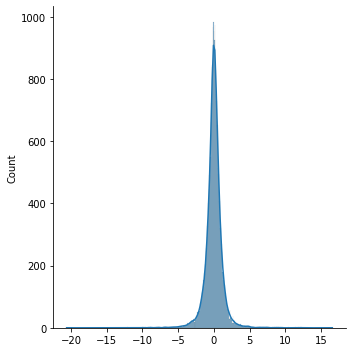

In [47]:
sns.displot(residuals2, kde=True)

<AxesSubplot:>

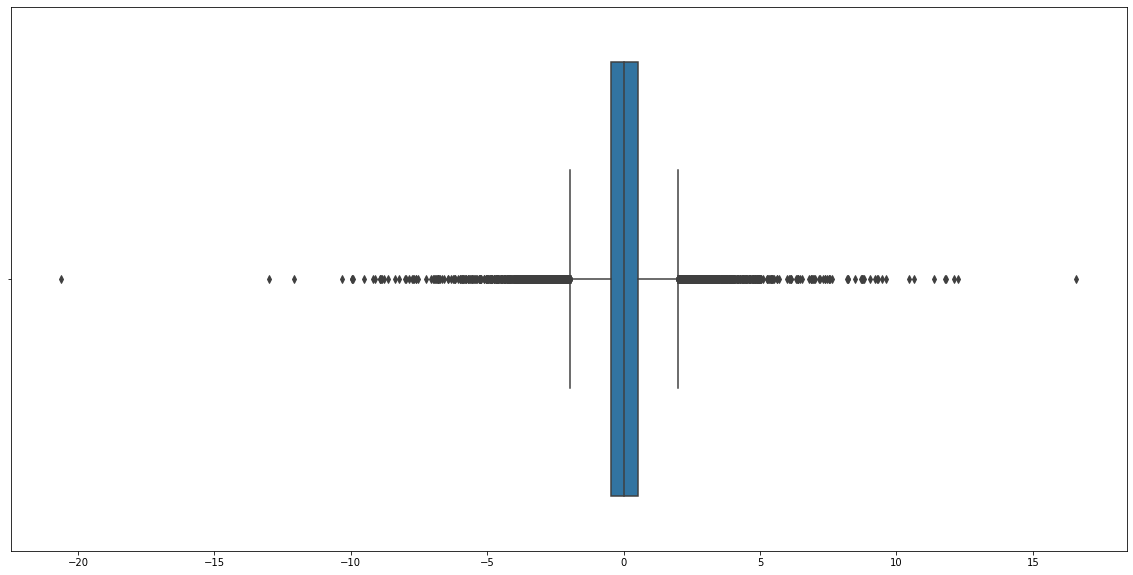

In [48]:
#We can see the negative skewness
sns.boxplot(x = residuals2)

In [49]:
df

,date,adj_close,lag1_price,return,cummax,drawdown,year
0,1928-01-03,17.760000,17.660000,0.566251,17.760000,0.000000,1928
1,1928-01-04,17.719999,17.760000,-0.225231,17.760000,-0.225231,1928
2,1928-01-05,17.549999,17.719999,-0.959368,17.760000,-1.182438,1928
3,1928-01-06,17.660000,17.549999,0.626786,17.760000,-0.563063,1928
4,1928-01-09,17.500000,17.660000,-0.906002,17.760000,-1.463964,1928
...,...,...,...,...,...,...,...
23170,2020-04-01,2470.500000,2584.590088,-4.414243,3386.149902,-27.041033,2020
23171,2020-04-02,2526.899902,2470.500000,2.282935,3386.149902,-25.375427,2020
23172,2020-04-03,2488.649902,2526.899902,-1.513713,3386.149902,-26.505029,2020
23173,2020-04-06,2663.679932,2488.649902,7.033132,3386.149902,-21.336030,2020


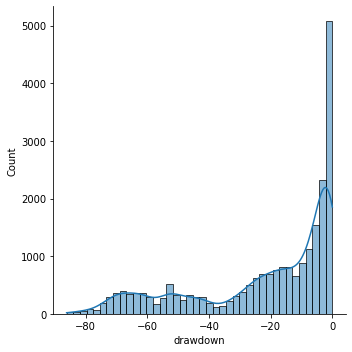

In [50]:
sns.displot(df['drawdown'], kde=True)

<AxesSubplot:xlabel='drawdown'>

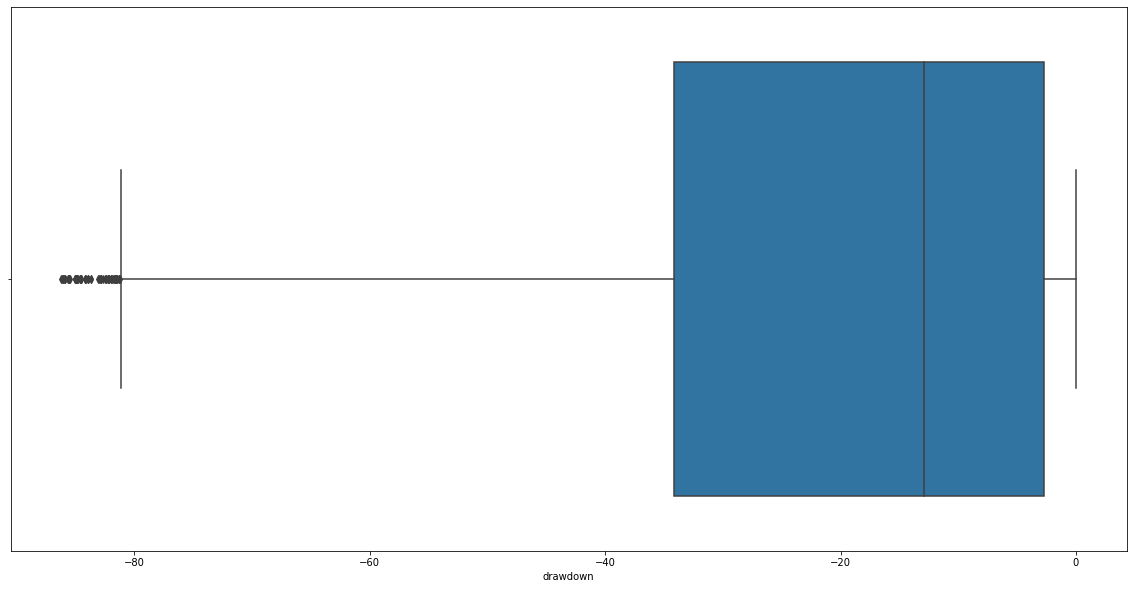

In [51]:
#IQR is shifted towards right and drawdowns above -80 are outliers, maybe those belong to some recessions
sns.boxplot(x = df['drawdown'])

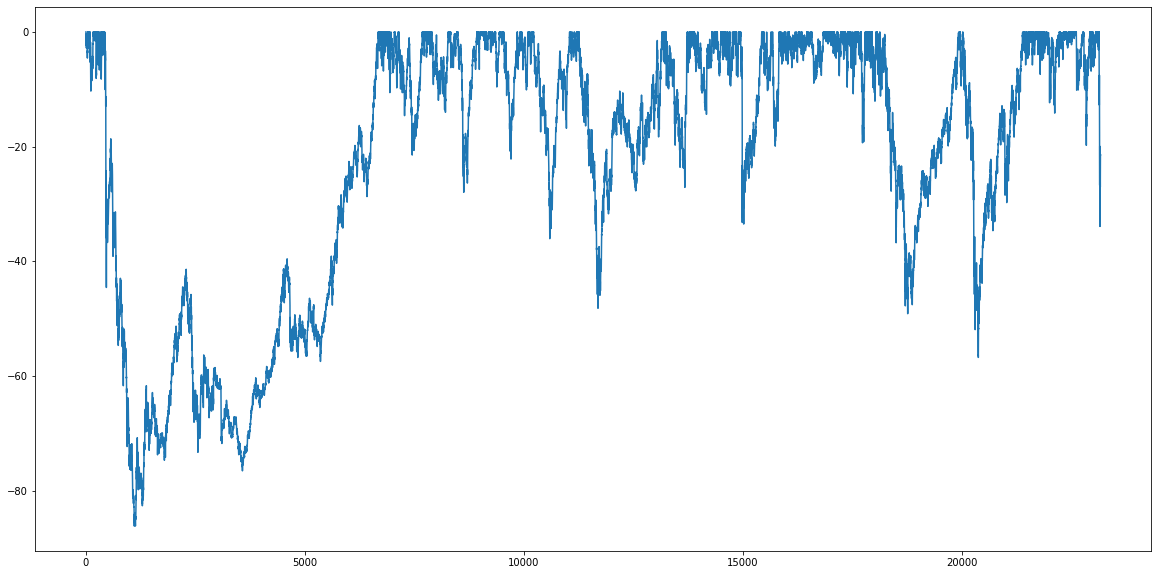

In [52]:
plt.plot(df['drawdown'])

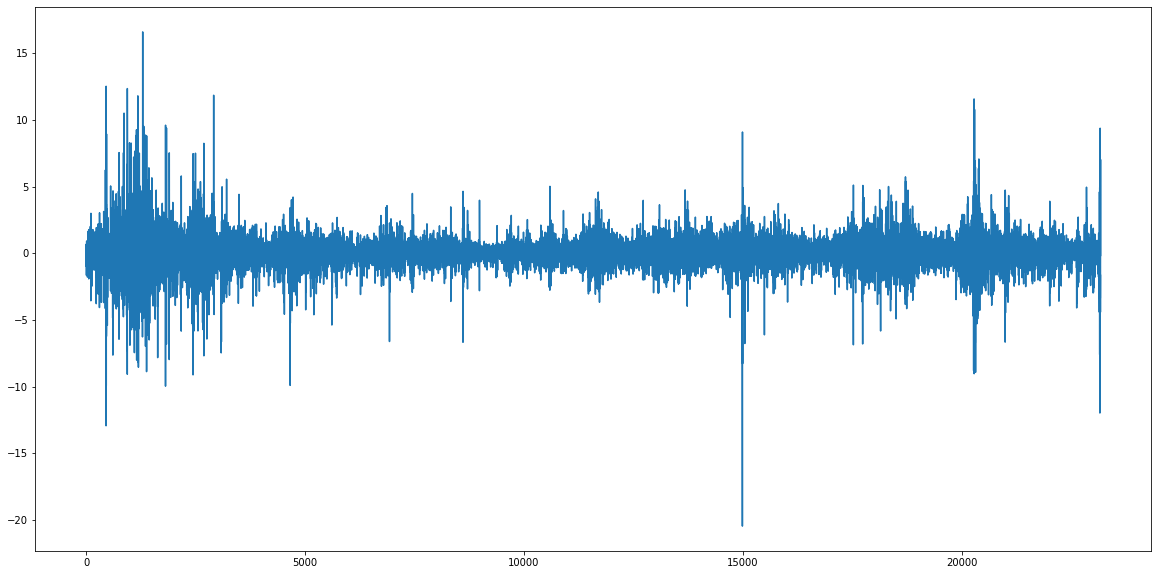

In [53]:

plt.plot(df['return'])

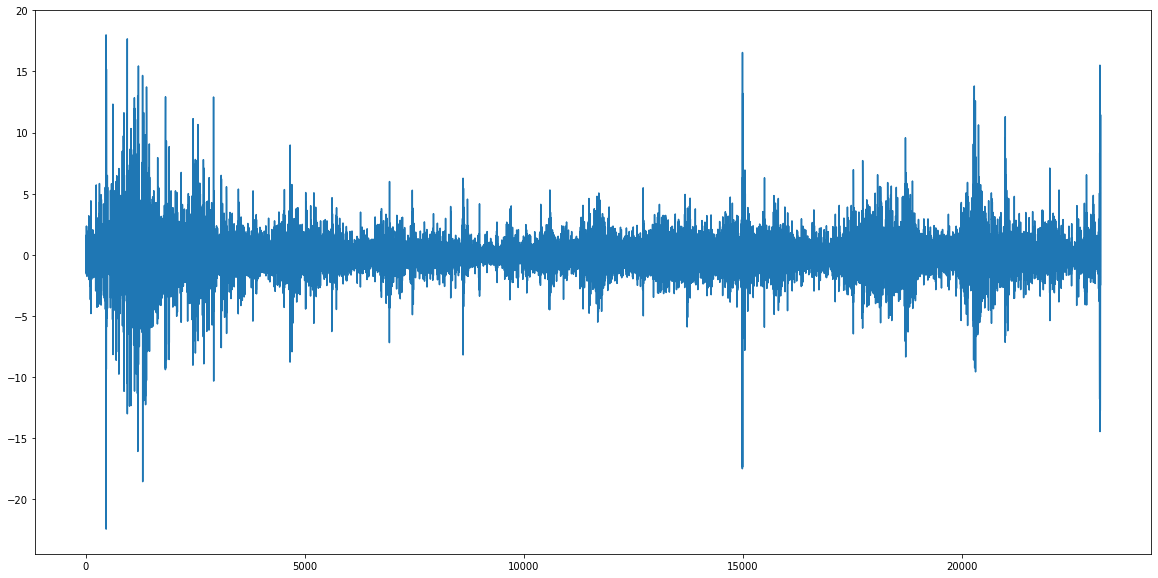

In [54]:

plt.plot(df['return']- df['return'].shift(3))

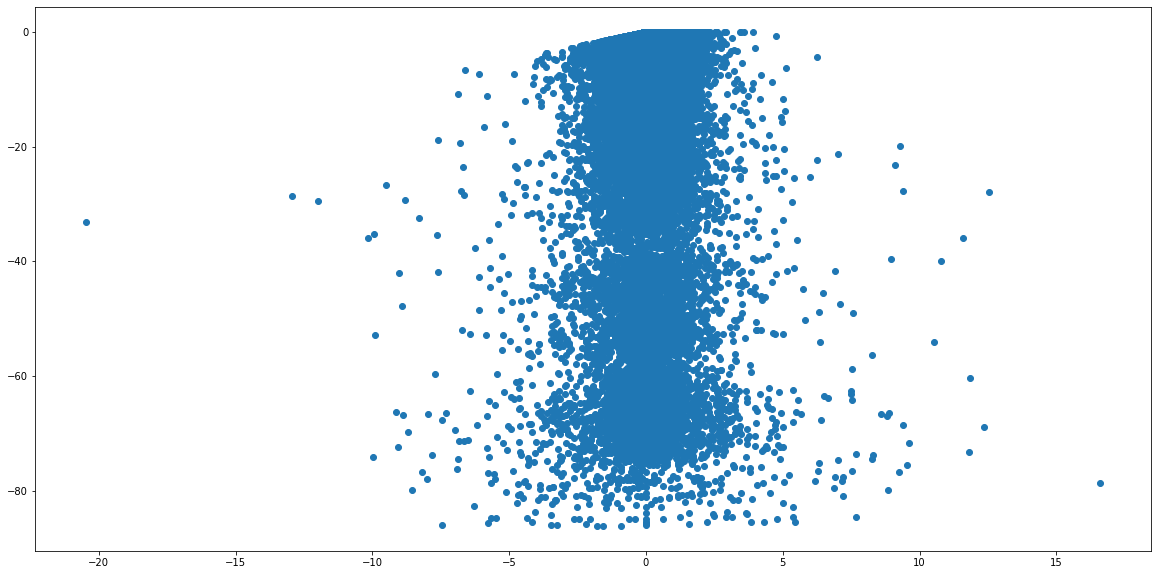

In [55]:
plt.scatter(df['return'], df['drawdown'])

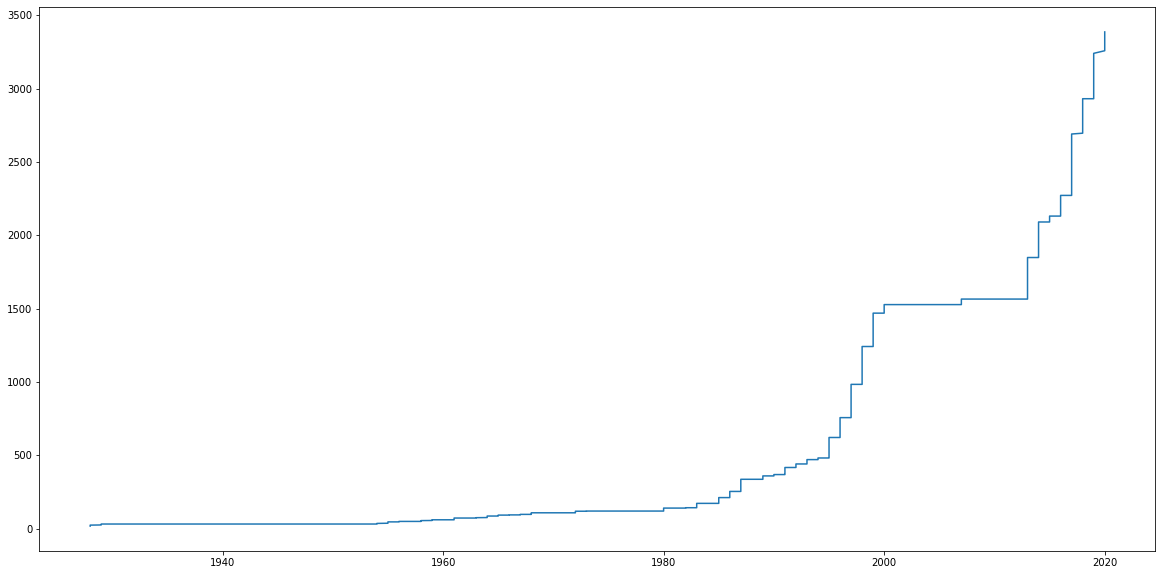

In [56]:
#We can see that peaks(cummmulative maximum) with time going forward, rose at a very steep slope as compared to history
plt.plot(df['year'],df['cummax'])

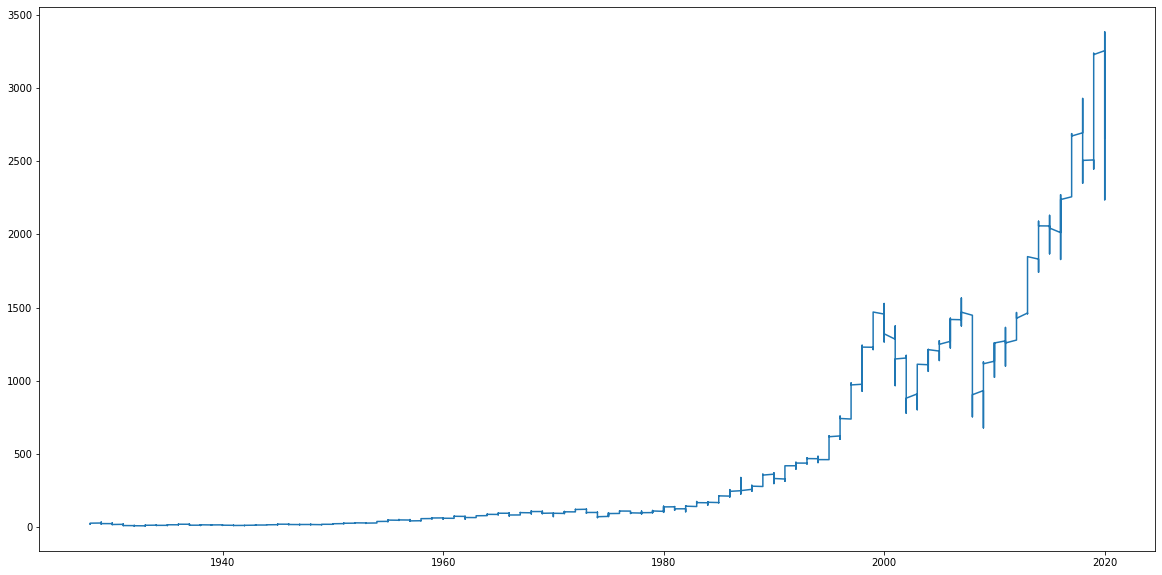

In [57]:
plt.plot(df['year'],df['adj_close'])

Text(0.5, 1.0, 'Cummulative maximums')

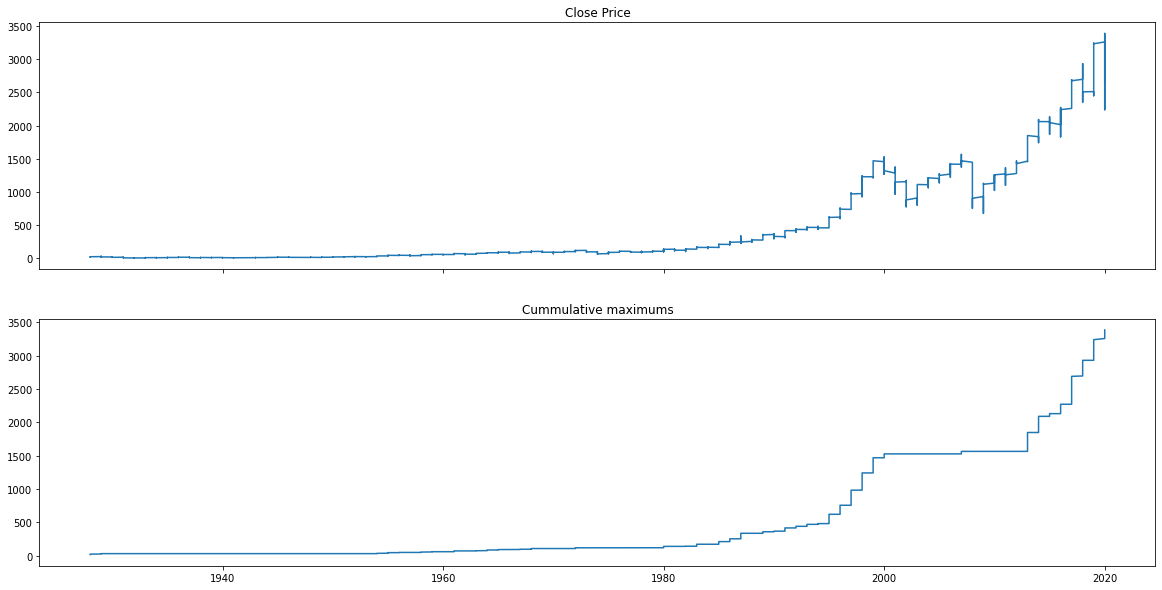

In [58]:
#We can see that during 2000-2014, markets never showed new peaks but from cummulative peaks we can say 
#that markets are long term uptrending 
fig, (ax1,ax2) = plt.subplots(nrows = 2, sharex=True)
ax1.plot(df['year'],df['adj_close'])
ax1.set_title('Close Price')
ax2.plot(df['year'],df['cummax'])
ax2.set_title('Cummulative maximums')

In [59]:
#57% of drawdowns exceeds our annualized return value 
df[df.drawdown<-8.21].shape[0]/df.shape[0]

0.5745846817691478

In [60]:
#on 52% od the given days todays close price was > yesterdays close price
df[ df['return']>0 ].shape[0]/df.shape[0]

0.5231067961165049

Text(0, 0.5, 'Return %')

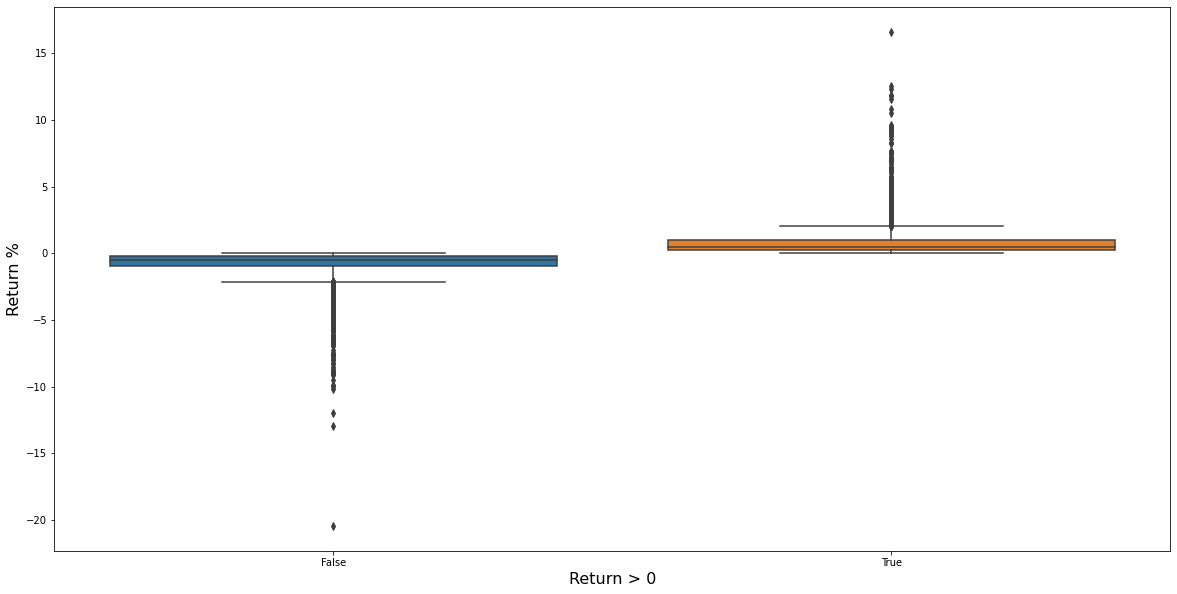

In [61]:
#Distribution of positive and negative returns
sns.boxplot(x = pd.Series(df['return']>0), y = df['return'])
plt.xlabel('Return > 0', fontsize = 16)
plt.ylabel('Return %', fontsize = 16)

In [62]:
df['dayofweek'] = df['date'].dt.dayofweek

Text(0, 0.5, 'Distribution')

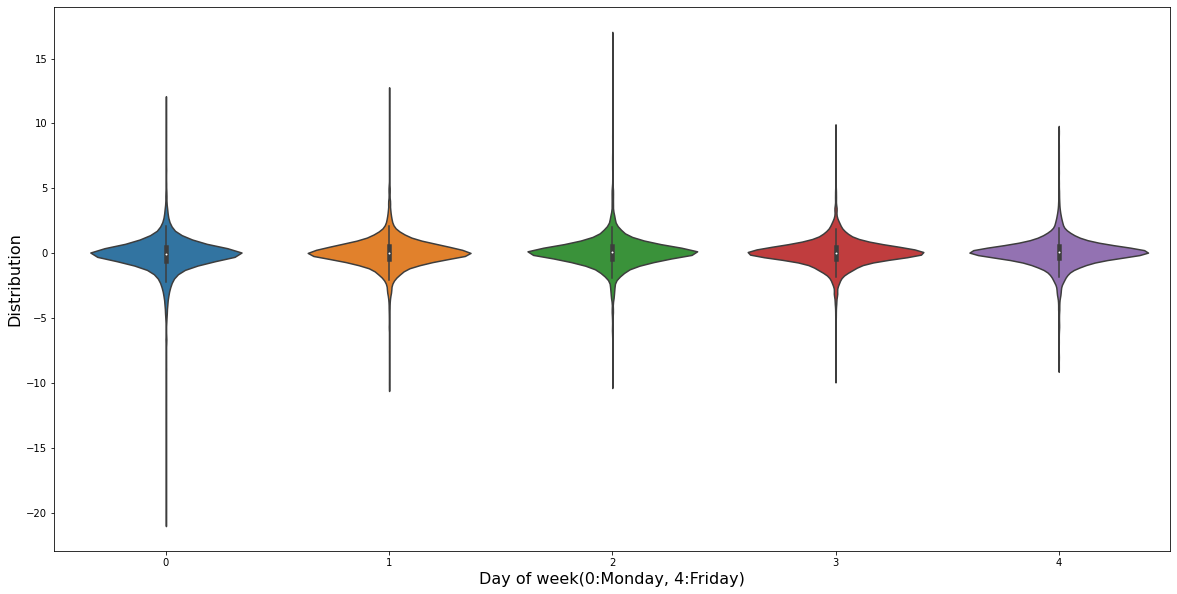

In [63]:
#Distribution of returns on days of week looks similar but there are much more outlier returns
#on monday and wednesday
sns.violinplot(y = df['return'], x = df['dayofweek'])
plt.xlabel('Day of week(0:Monday, 4:Friday)', fontsize = 16)
plt.ylabel('Distribution', fontsize = 16)

Text(0, 0.5, 'Distribution')

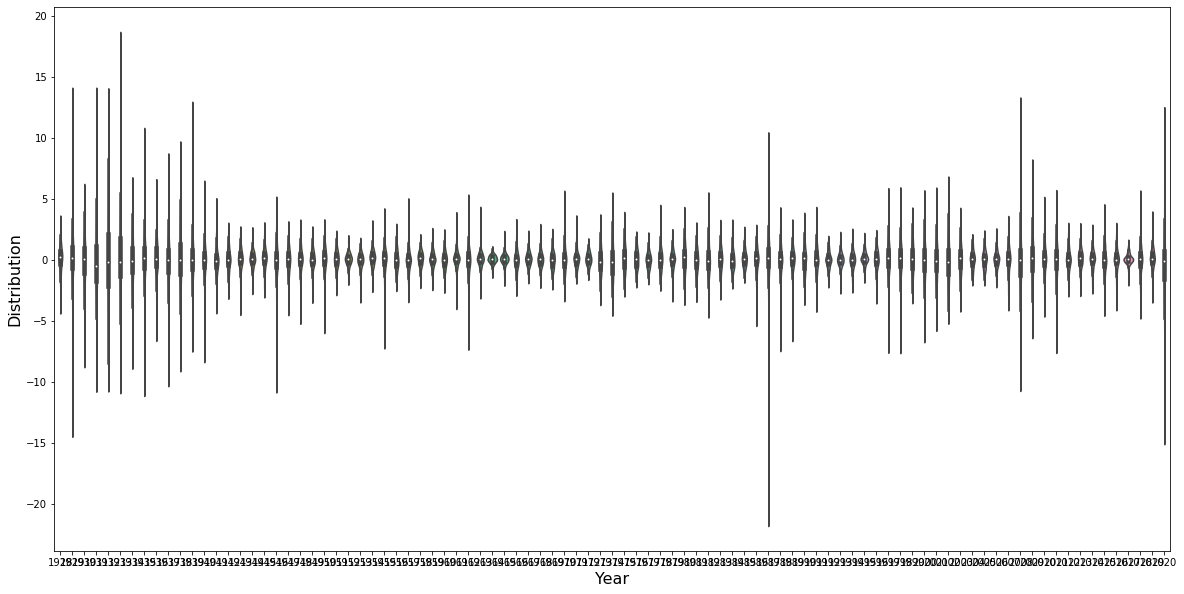

In [64]:
sns.violinplot(y = df['return'], x = df['year'])
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Distribution', fontsize = 16)